In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile


In [3]:
with ZipFile('/content/drive/MyDrive/Flowers-Dataset (1).zip', 'r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/test')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip =
True,zoom_range = 0.2)
test_datagen = ImageDataGenerator(rescale= 1./255)
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/test/flowers",target_size = (64,64),class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [6]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/test/flowers",target_size = (64,64),
 
class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [8]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

MODEL CREATION


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))
len(x_train)


180

COMPILE THE MODEL


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

FIT THE MODEL

In [11]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 67s 368ms/step - loss: 1.2909 - accuracy: 0.4858 - val_loss: 1.1398 - val_accuracy: 0.5390
Epoch 2/10
180/180 [==============================] - 65s 363ms/step - loss: 1.0631 - accuracy: 0.5849 - val_loss: 1.0429 - val_accuracy: 0.5974
Epoch 3/10
180/180 [==============================] - 66s 368ms/step - loss: 0.9760 - accuracy: 0.6143 - val_loss: 1.0506 - val_accuracy: 0.5974
Epoch 4/10
180/180 [==============================] - 65s 361ms/step - loss: 0.9086 - accuracy: 0.6472 - val_loss: 0.8790 - val_accuracy: 0.6639
Epoch 5/10
180/180 [==============================] - 68s 379ms/step - loss: 0.8723 - accuracy: 0.6579 - val_loss: 0.8402 - val_accuracy: 0.6838
Epoch 6/10
180/180 [==============================] - 65s 359ms/step - loss: 0.8483 - accuracy: 0.6711 - val_loss: 0.7703 - val_accuracy: 0.7130
Epoch 7/10
180/180 [==============================] - 64s 355ms/step - loss: 0.8156 - accuracy: 0.6817 - val_loss: 0.7380 - val_ac

SAVE THE MODEL

In [12]:
model.save('IBM_flowers.h5')

TEST THE MODEL

In [13]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('IBM_flowers.h5')
img=image.load_img(r'/content/drive/MyDrive/test/flowers/rose/394990940_7af082cf8d_n.jpg')

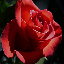

In [14]:
img=image.load_img(r'/content/drive/MyDrive/test/flowers/rose/394990940_7af082cf8d_n.jpg',target_size=(64,64))
img

In [15]:
x=image.img_to_array(img)
x

array([[[ 4., 14.,  3.],
        [ 4., 15.,  0.],
        [ 7., 10.,  3.],
        ...,
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 3.,  3.,  3.]],

       [[21., 37.,  8.],
        [ 7., 18.,  1.],
        [ 5., 11.,  1.],
        ...,
        [ 1.,  1.,  3.],
        [ 1.,  1.,  1.],
        [ 2.,  2.,  2.]],

       [[15., 34.,  4.],
        [ 5., 18.,  0.],
        [ 6., 14.,  3.],
        ...,
        [ 1.,  2.,  4.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]],

       ...,

       [[ 7., 11., 10.],
        [ 7., 16., 15.],
        [17., 23., 21.],
        ...,
        [ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 0.,  0.,  0.]],

       [[ 9., 18., 15.],
        [ 2.,  7.,  3.],
        [ 5., 11.,  7.],
        ...,
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[18., 26., 28.],
        [ 0., 10.,  2.],
        [ 8., 14., 10.],
        ...,
        [ 2.,  6.,  9.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]

In [16]:
x=np.expand_dims(x,axis=0)
x


array([[[[ 4., 14.,  3.],
         [ 4., 15.,  0.],
         [ 7., 10.,  3.],
         ...,
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 3.,  3.,  3.]],

        [[21., 37.,  8.],
         [ 7., 18.,  1.],
         [ 5., 11.,  1.],
         ...,
         [ 1.,  1.,  3.],
         [ 1.,  1.,  1.],
         [ 2.,  2.,  2.]],

        [[15., 34.,  4.],
         [ 5., 18.,  0.],
         [ 6., 14.,  3.],
         ...,
         [ 1.,  2.,  4.],
         [ 0.,  0.,  0.],
         [ 1.,  1.,  1.]],

        ...,

        [[ 7., 11., 10.],
         [ 7., 16., 15.],
         [17., 23., 21.],
         ...,
         [ 1.,  1.,  1.],
         [ 2.,  2.,  2.],
         [ 0.,  0.,  0.]],

        [[ 9., 18., 15.],
         [ 2.,  7.,  3.],
         [ 5., 11.,  7.],
         ...,
         [ 0.,  0.,  0.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.]],

        [[18., 26., 28.],
         [ 0., 10.,  2.],
         [ 8., 14., 10.],
         ...,
         [ 2.,  6.,  9.],
        

In [17]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 116ms/step


array([4])

In [18]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [19]:
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

'tulip'